In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)


2. Importing Power Generation & Weather Sensor Data

In [3]:
generation_data = pd.read_csv("C:\\Users\\Techbrain Networks 1\\Desktop\\Solar_power_plant_Data.csv\\Plant_2_Generation_Data.csv")

In [4]:
Weather_data = pd.read_csv("C:\\Users\\Techbrain Networks 1\\Desktop\\Solar_power_plant_Data.csv\\Plant_2_Weather_Sensor_Data.csv")

In [5]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'green',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
50914,2020-06-10 01:15:00,4136001,9kRcWv60rDACzjR,0.000000,0.000000,0.000000,2247877986.000000
595,2020-05-15 06:45:00,4136001,81aHJ1q11NBPMrL,149.040000,145.606667,37.266667,1215278773.266667
16750,2020-05-23 18:30:00,4136001,Mx2yZCDsyf6DPfv,3.993333,3.860000,9655.000000,2526030.000000
6612,2020-05-18 03:15:00,4136001,V94E5Ben1TlhnDV,0.000000,0.000000,0.000000,1412105943.000000
65860,2020-06-17 03:00:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,0.000000,838642278.000000


In [6]:
Weather_data.sample(5).style.set_properties(
    **{
       'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1018,2020-05-25 15:00:00,4136001,iq8k7ZNt4Mwm3w0,37.031745,53.851719,0.644652
2193,2020-06-06 21:30:00,4136001,iq8k7ZNt4Mwm3w0,25.632065,24.262790,0.000000
2538,2020-06-10 11:45:00,4136001,iq8k7ZNt4Mwm3w0,31.920121,48.976286,0.724678
2926,2020-06-14 12:45:00,4136001,iq8k7ZNt4Mwm3w0,32.103895,52.801106,0.884950
1977,2020-06-04 15:30:00,4136001,iq8k7ZNt4Mwm3w0,28.495817,35.430656,0.311134


3. Adjust datetime format

In [7]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
Weather_data['DATE_TIME'] = pd.to_datetime(Weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

4.Merging generation data and weather sensor data

In [8]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), Weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='hot')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
177,2020-05-15 02:00:00,81aHJ1q11NBPMrL,0.000000,0.000000,0.000000,1215278736.000000,26.401946,24.691469,0.000000
4383,2020-05-17 02:00:00,LYwnQax7tkwH5Cb,0.000000,0.000000,0.000000,1794970268.000000,24.730062,22.411698,0.000000
59671,2020-06-14 04:45:00,Et9kgGMDl729KT4,0.000000,0.000000,5929.000000,1841290.000000,24.015047,23.309084,0.000000
65246,2020-06-16 20:00:00,V94E5Ben1TlhnDV,0.000000,0.000000,5407.000000,1412288191.000000,25.054365,24.751305,0.000000
27600,2020-05-29 23:45:00,NgDl19wMapZy17u,0.000000,0.000000,8027.000000,111630197.000000,27.239228,25.907133,0.000000


5. Adding separate time and date columns

In [9]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [10]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [11]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [12]:
df_solar.describe().style.background_gradient(cmap='cividis')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
std,370.569597,362.112118,2919.448386,729667771.073221,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274
min,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000


6. Converting 'SOURCE_KEY' from categorical form to numerical form

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


# Data Visualization

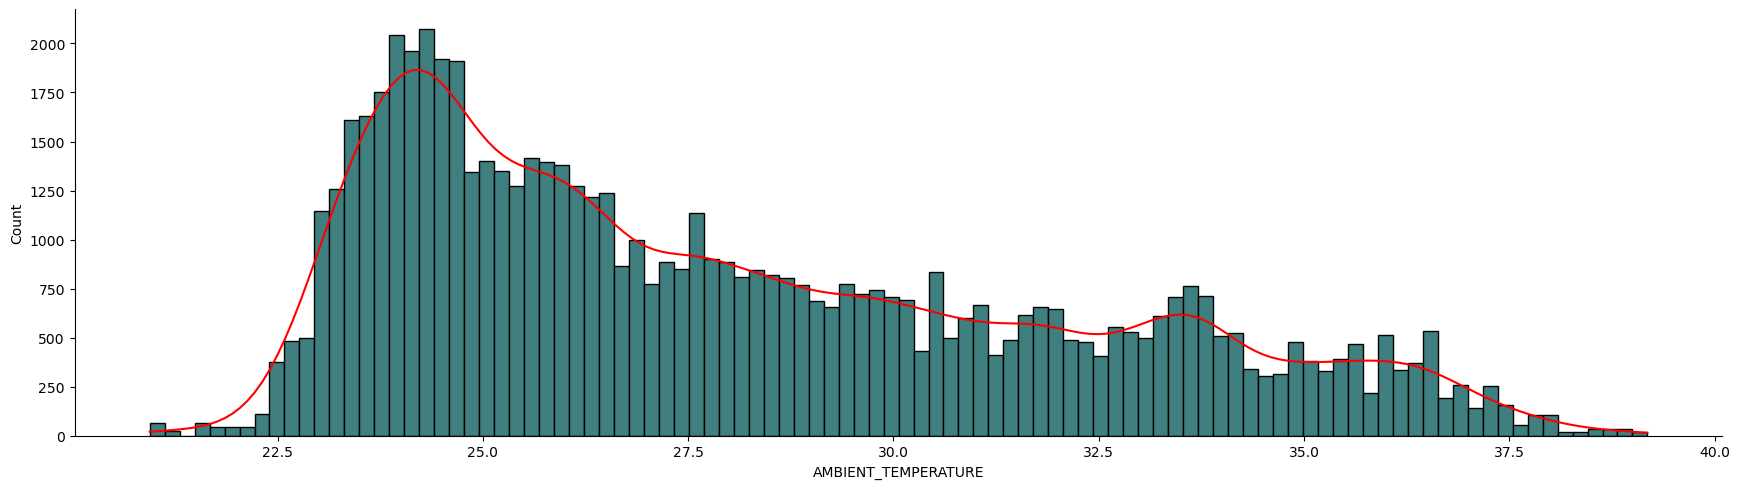

In [14]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [15]:
df_solar['DATE'].nunique()

34

# Faults & Abnormalities detection in solar power plant generation

7. Multiple Plotting of DC_POWER generation on per day basis.

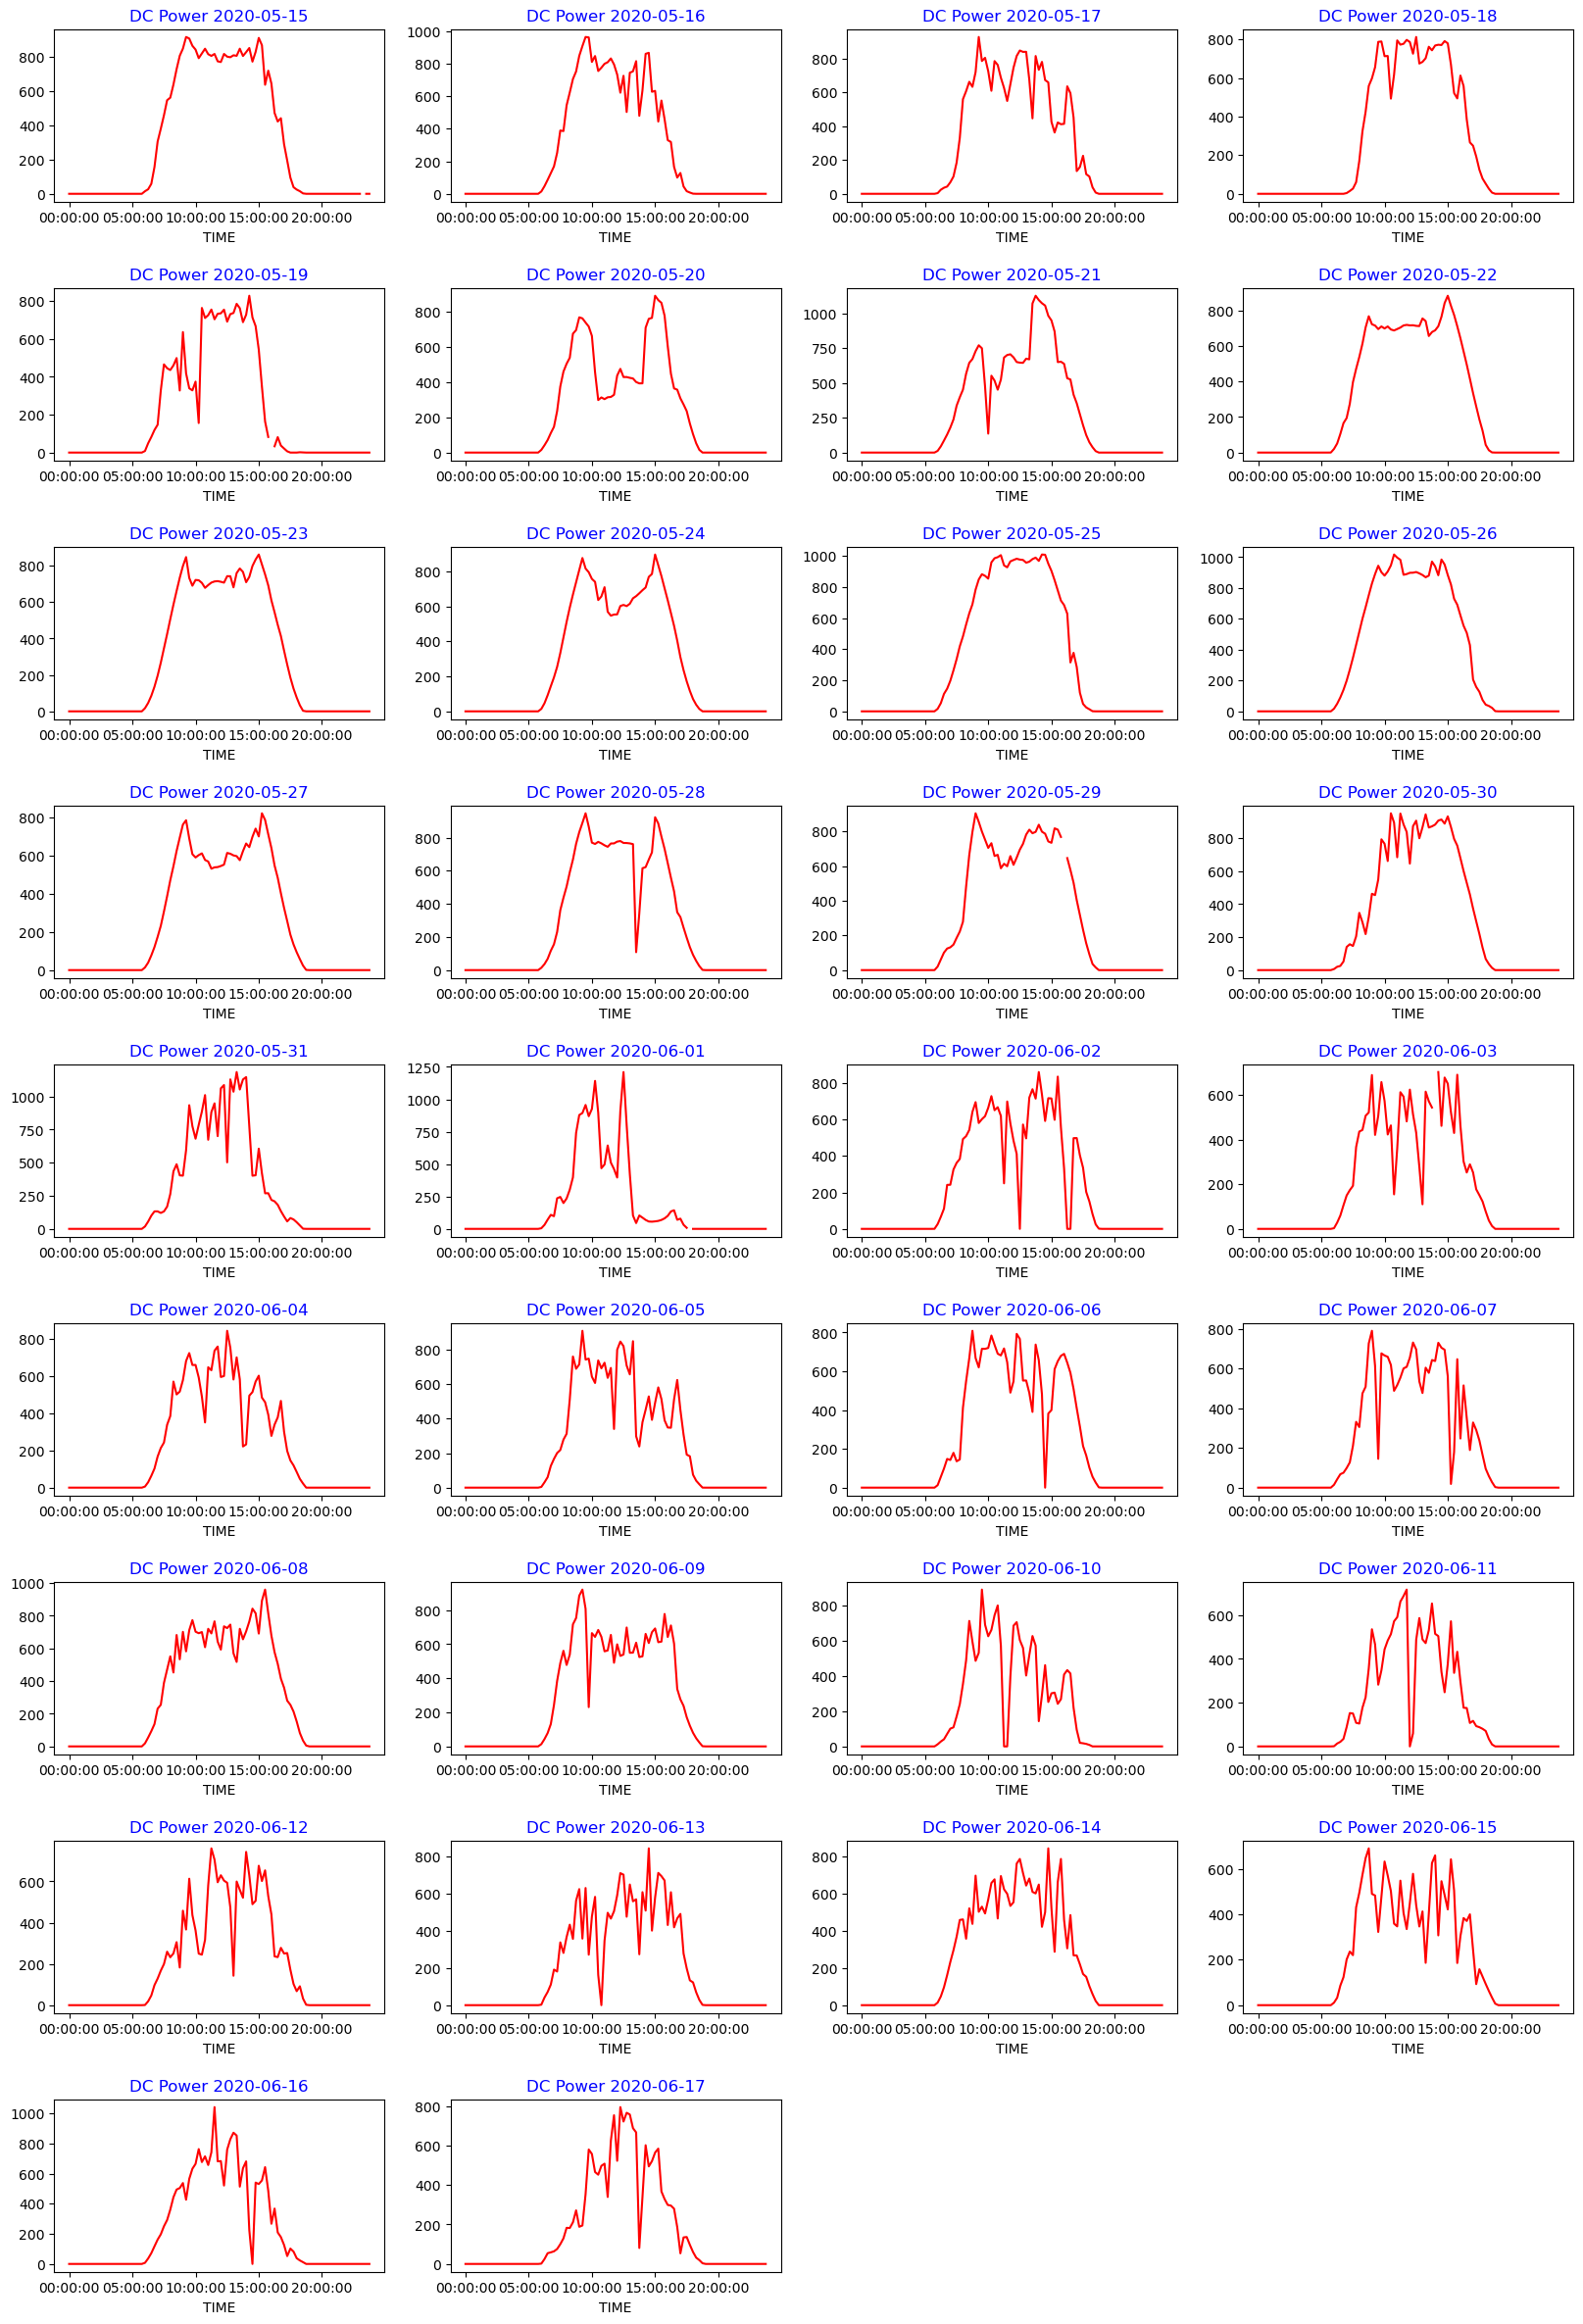

In [16]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=4)

# Abnormalities in DC_POWER Generation

Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.

Less Fluctuation in DC_POWER generation is observed in these days.

2020-05-15
2020-05-18
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
High Fluctuation in DC_POWER generation is observed in these days.

2020-05-19
2020-05-28
2020-05-29
2020-06-02
2020-06-03
2020-06-04
2020-06-13
2020-06-14
2020-06-17
Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.

2020-06-03
2020-06-11
2020-06-12
2020-06-15
Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further

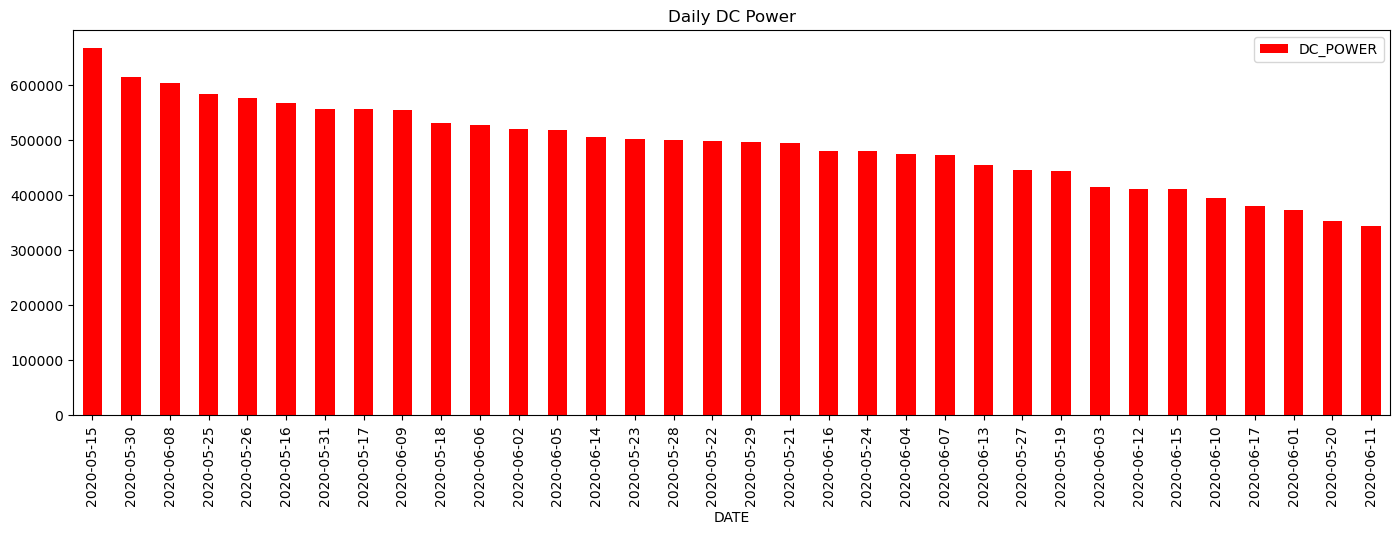

In [17]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

Form the per day DC_POWER generation graph we can find the average power generation per day.

Highest average DC_POWER Generation is on: 2020-05-15

Lowest average DC_POWER Generation is on : 2020-06-11

8. Multiple Plotting of IRRADIATION generation on per day basis.

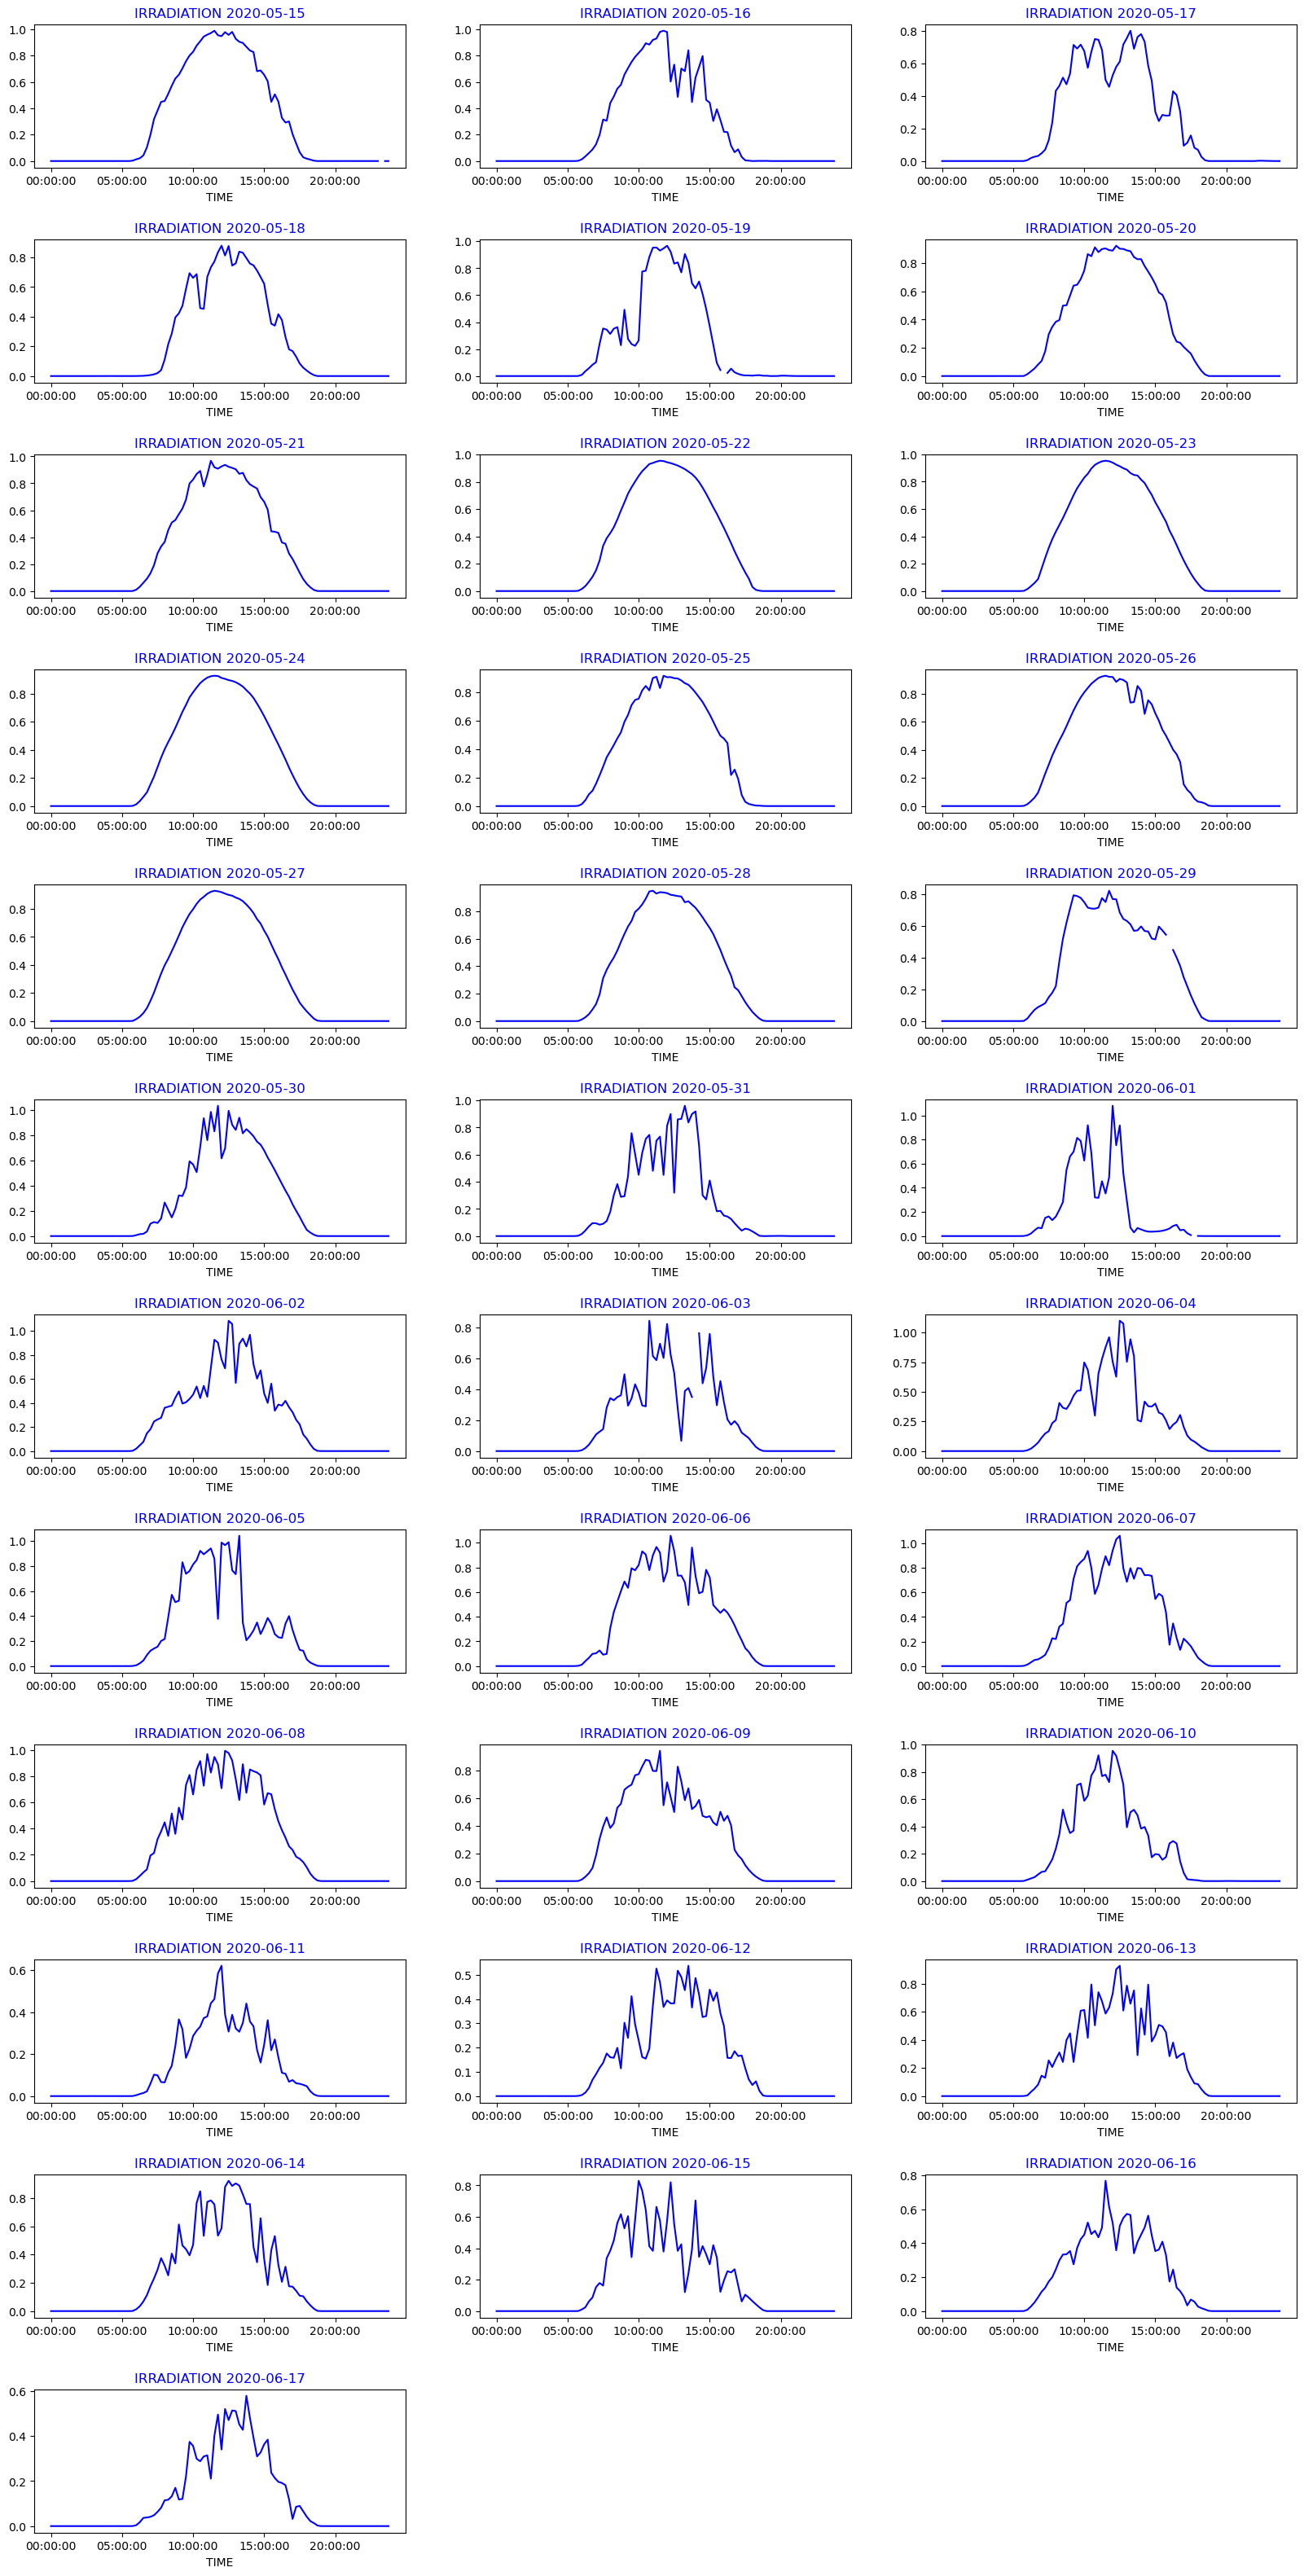

In [18]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

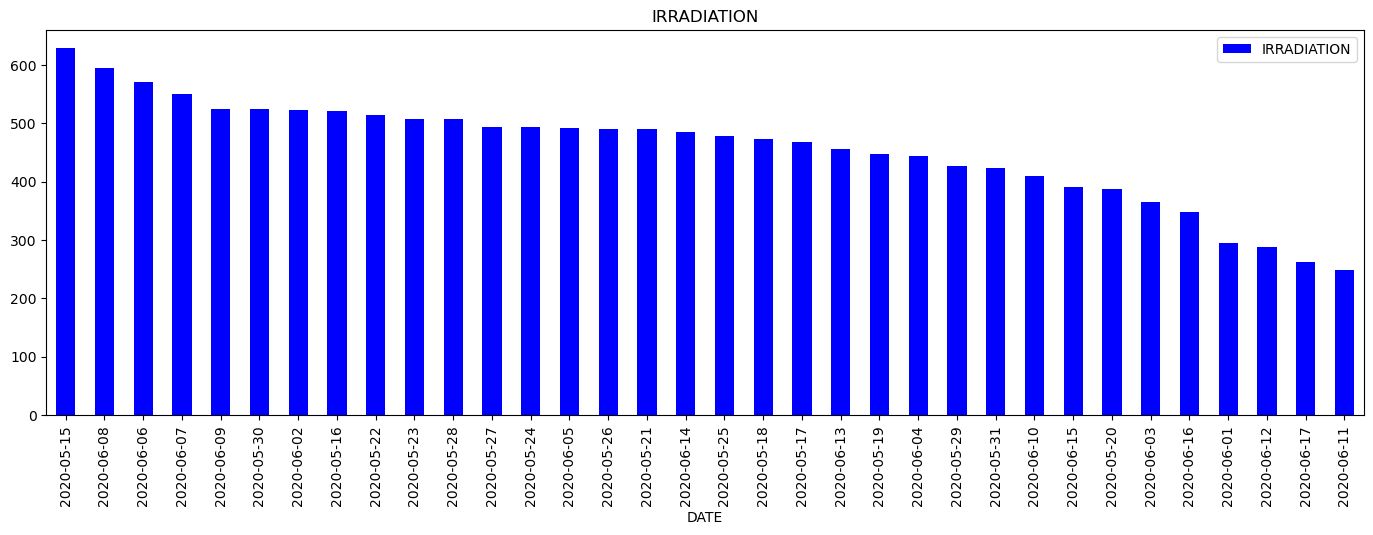

In [19]:
daily_dc = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

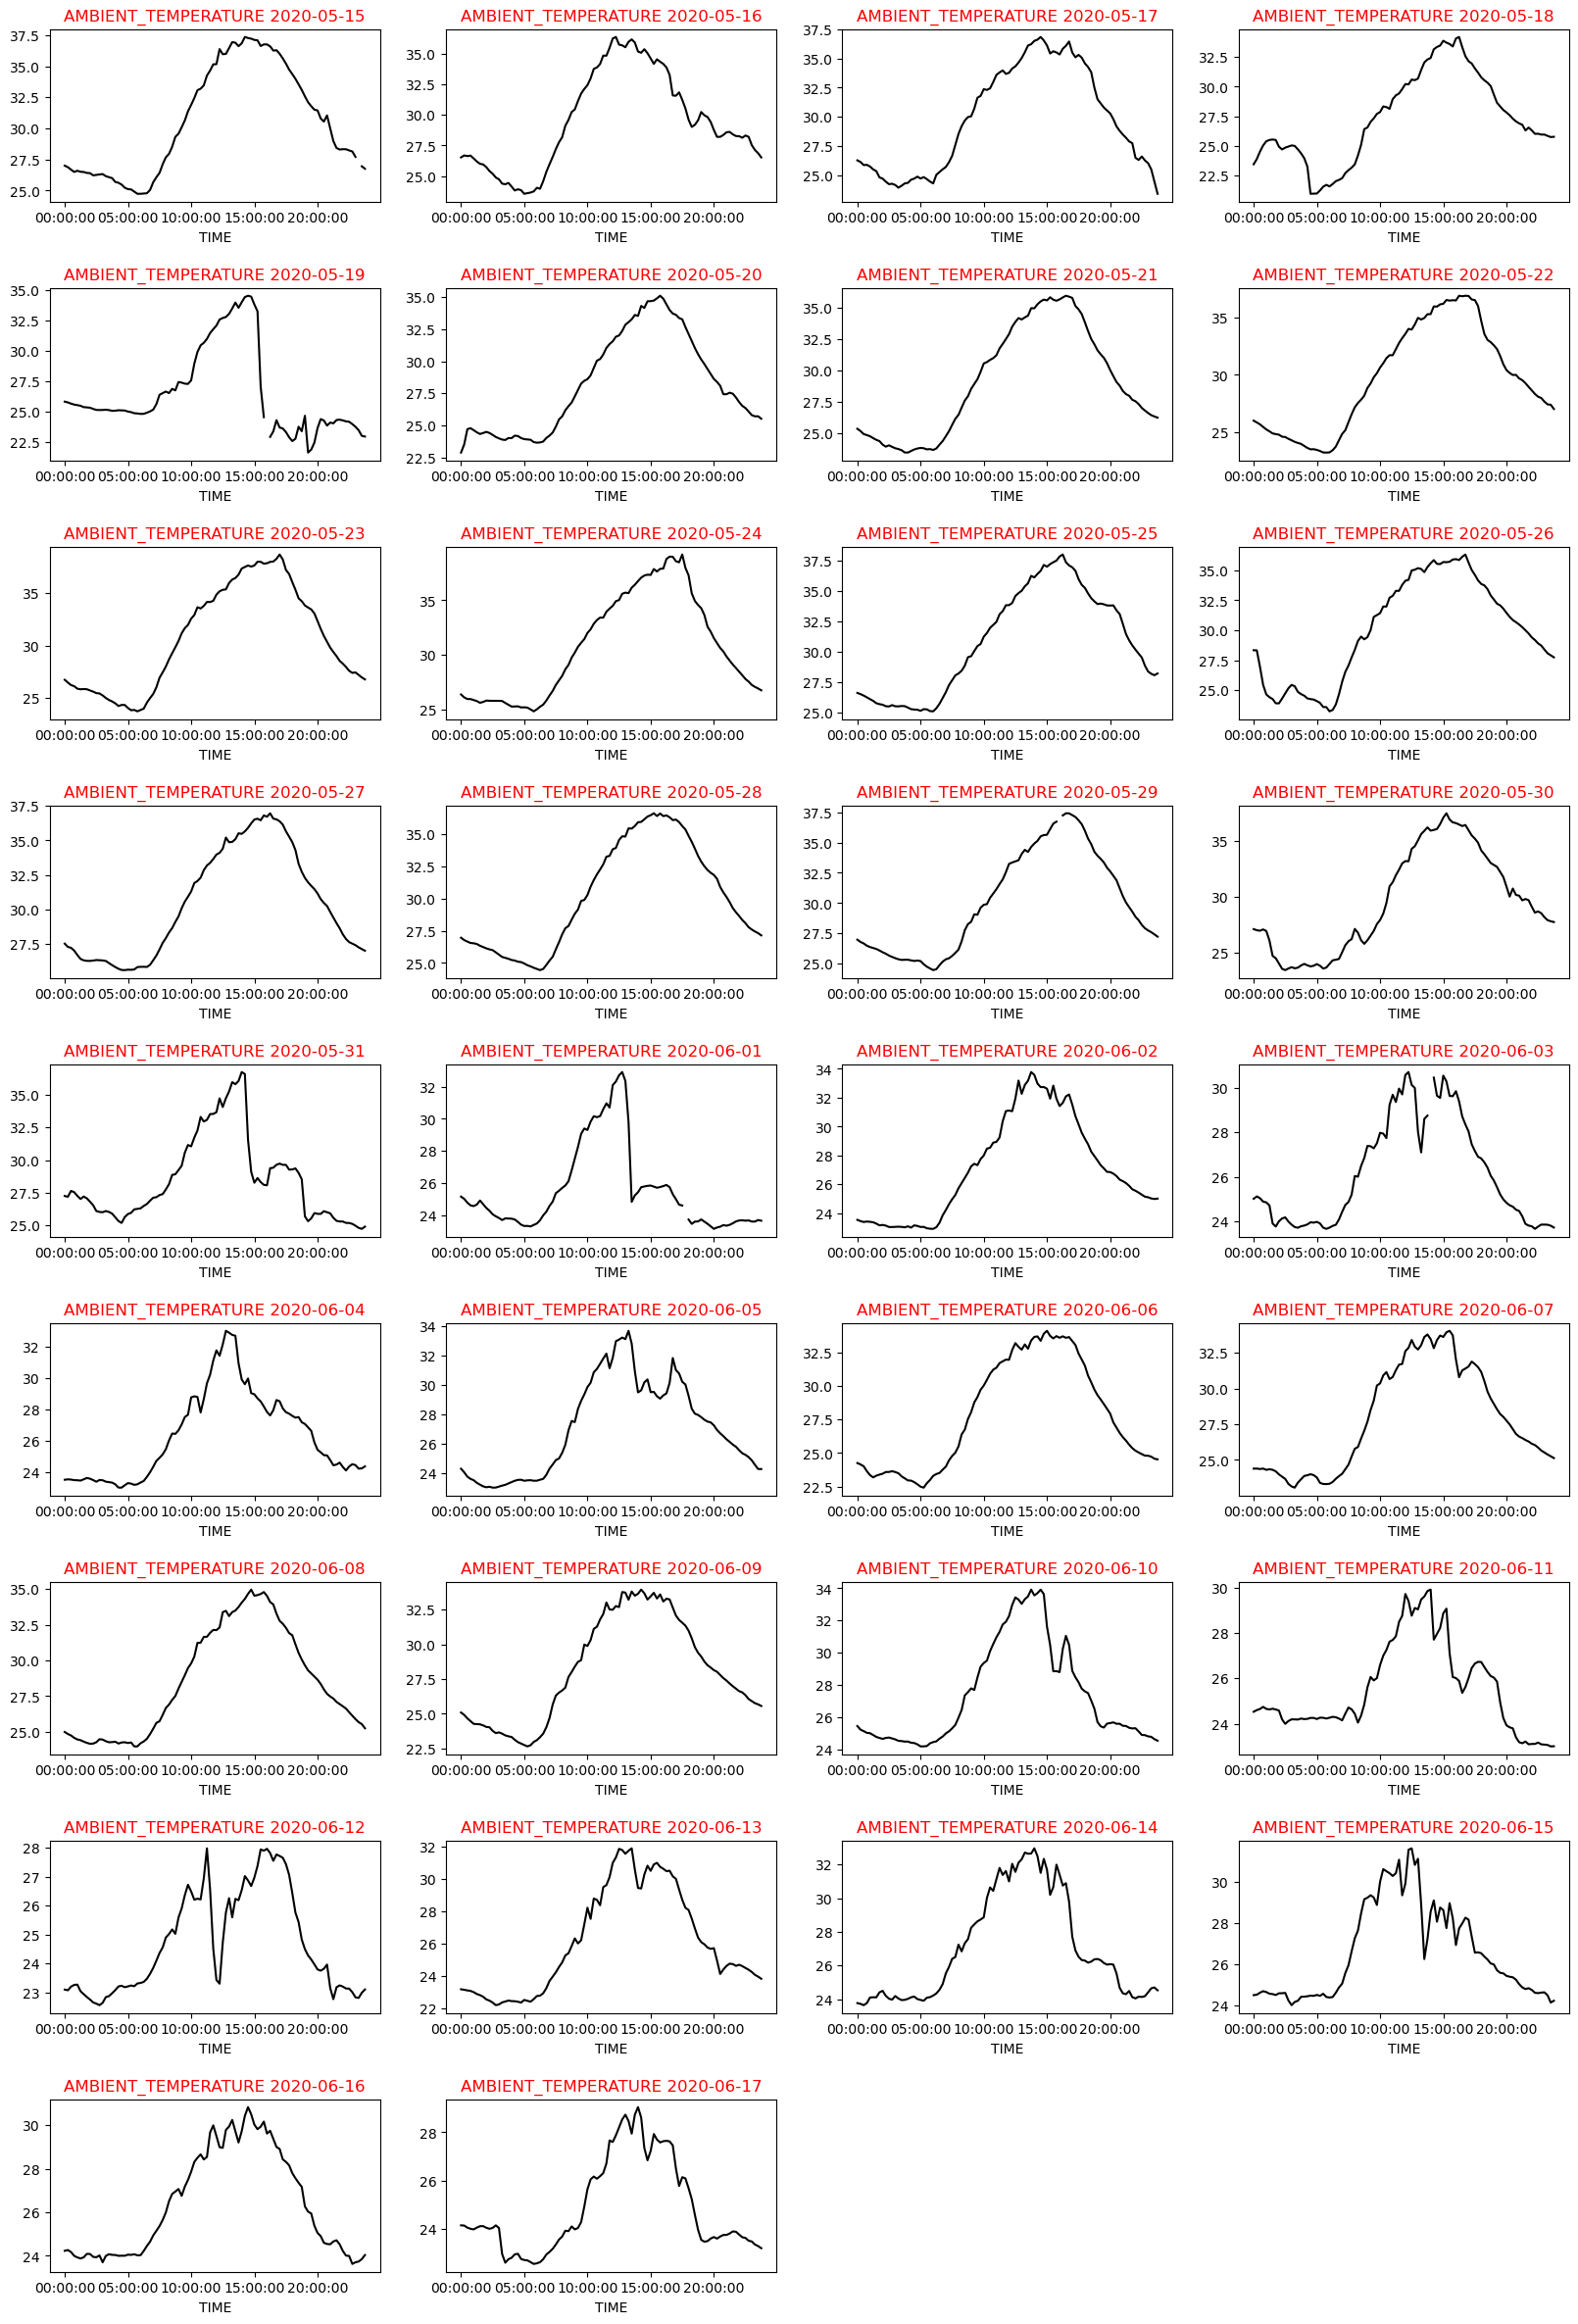

In [20]:
solar_dc = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='black')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_dc, row=12, col=4)

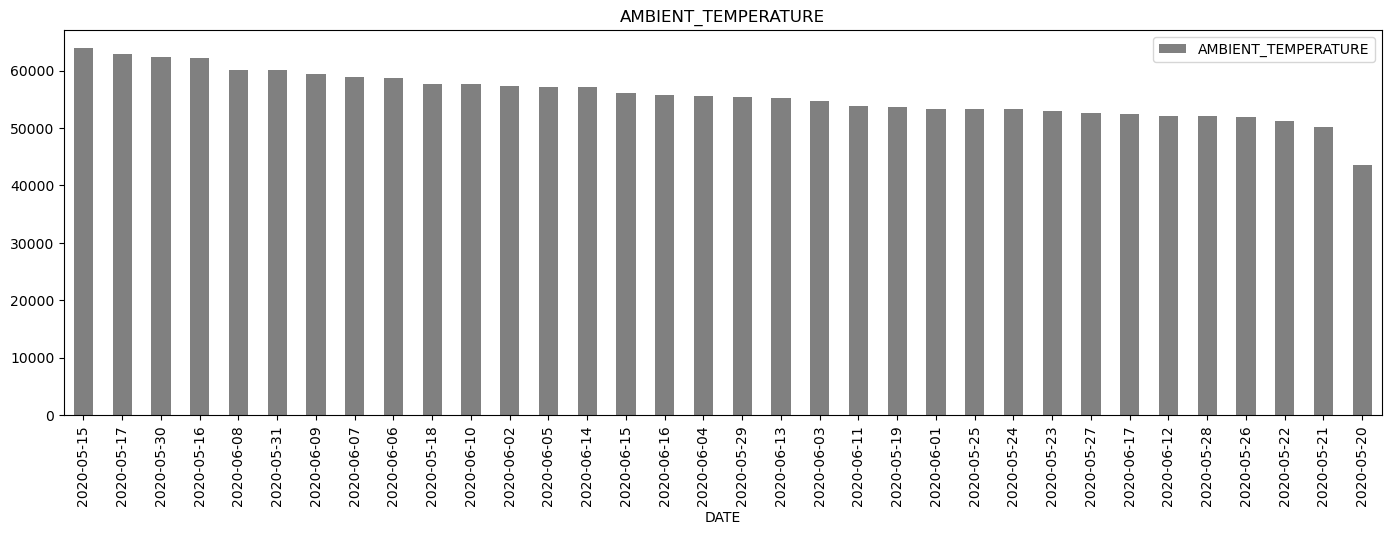

In [21]:
daily_dc = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='grey')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

9. Highest average DC_POWER is generated on "2020-05-15"

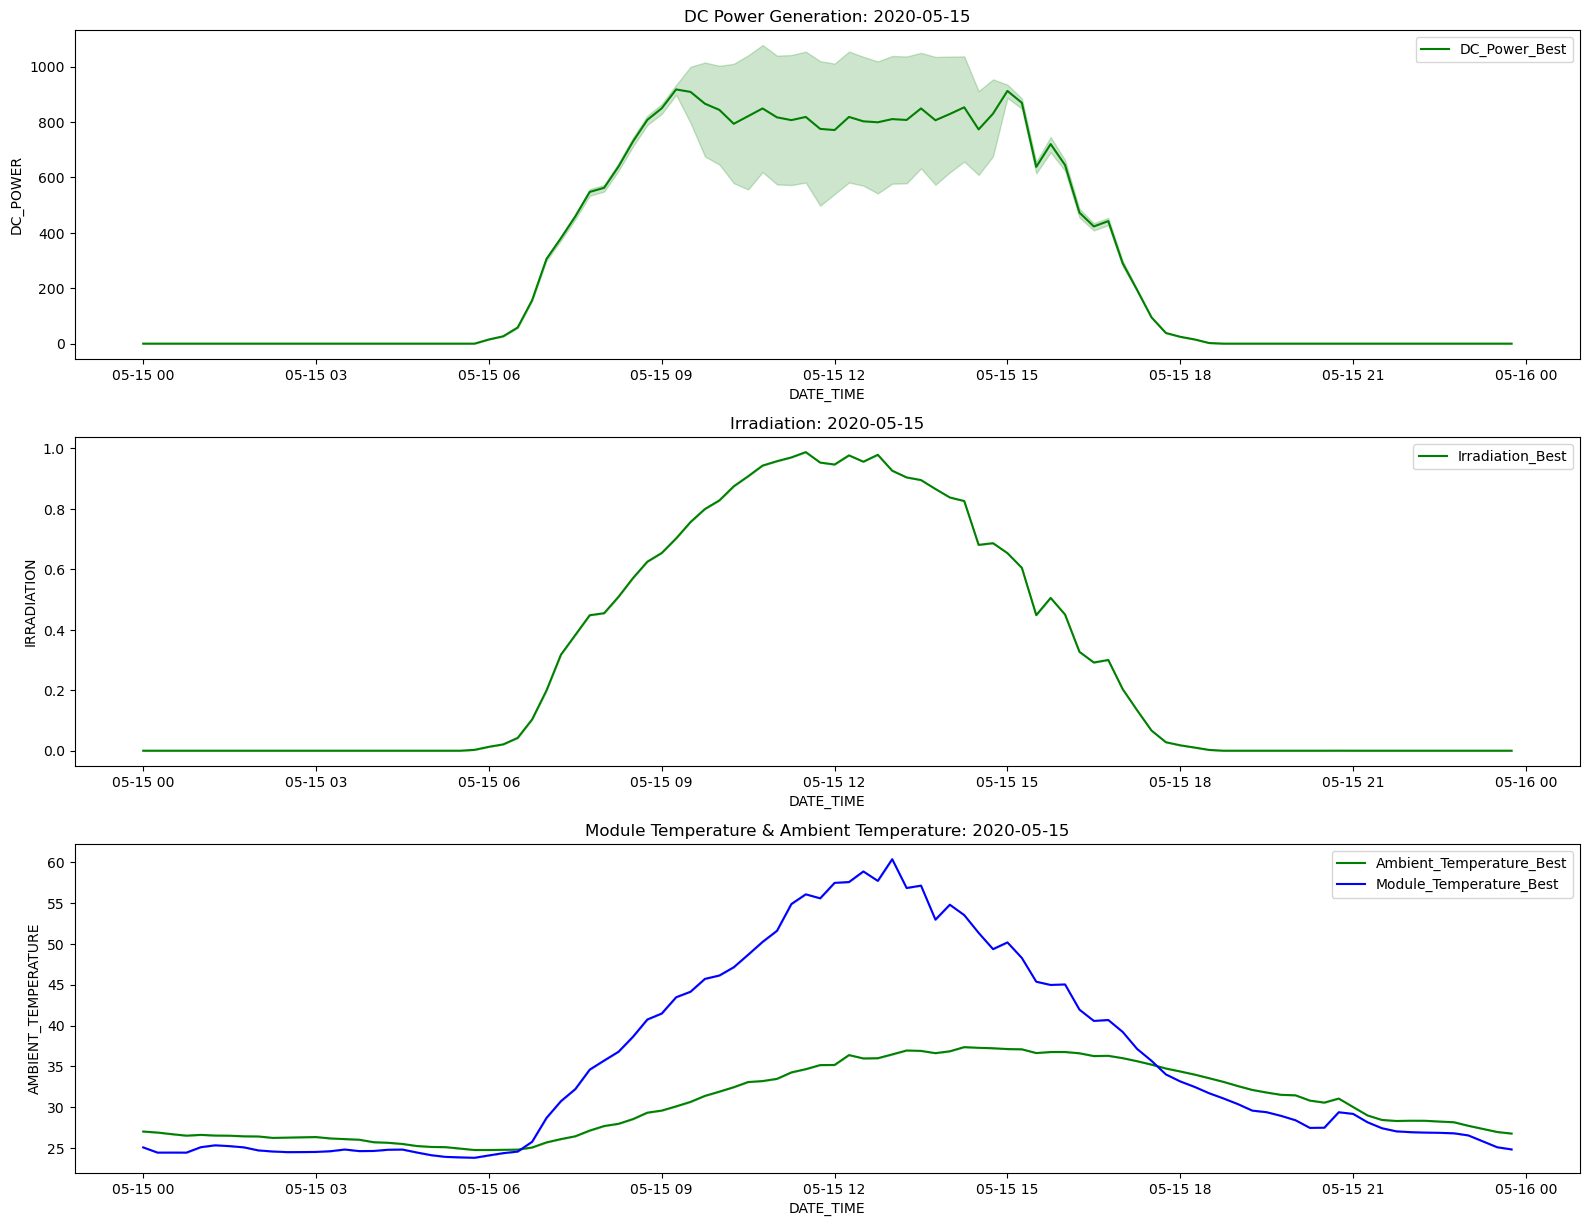

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

10. Lowest average DC_POWER is generated on "2020-06-11"

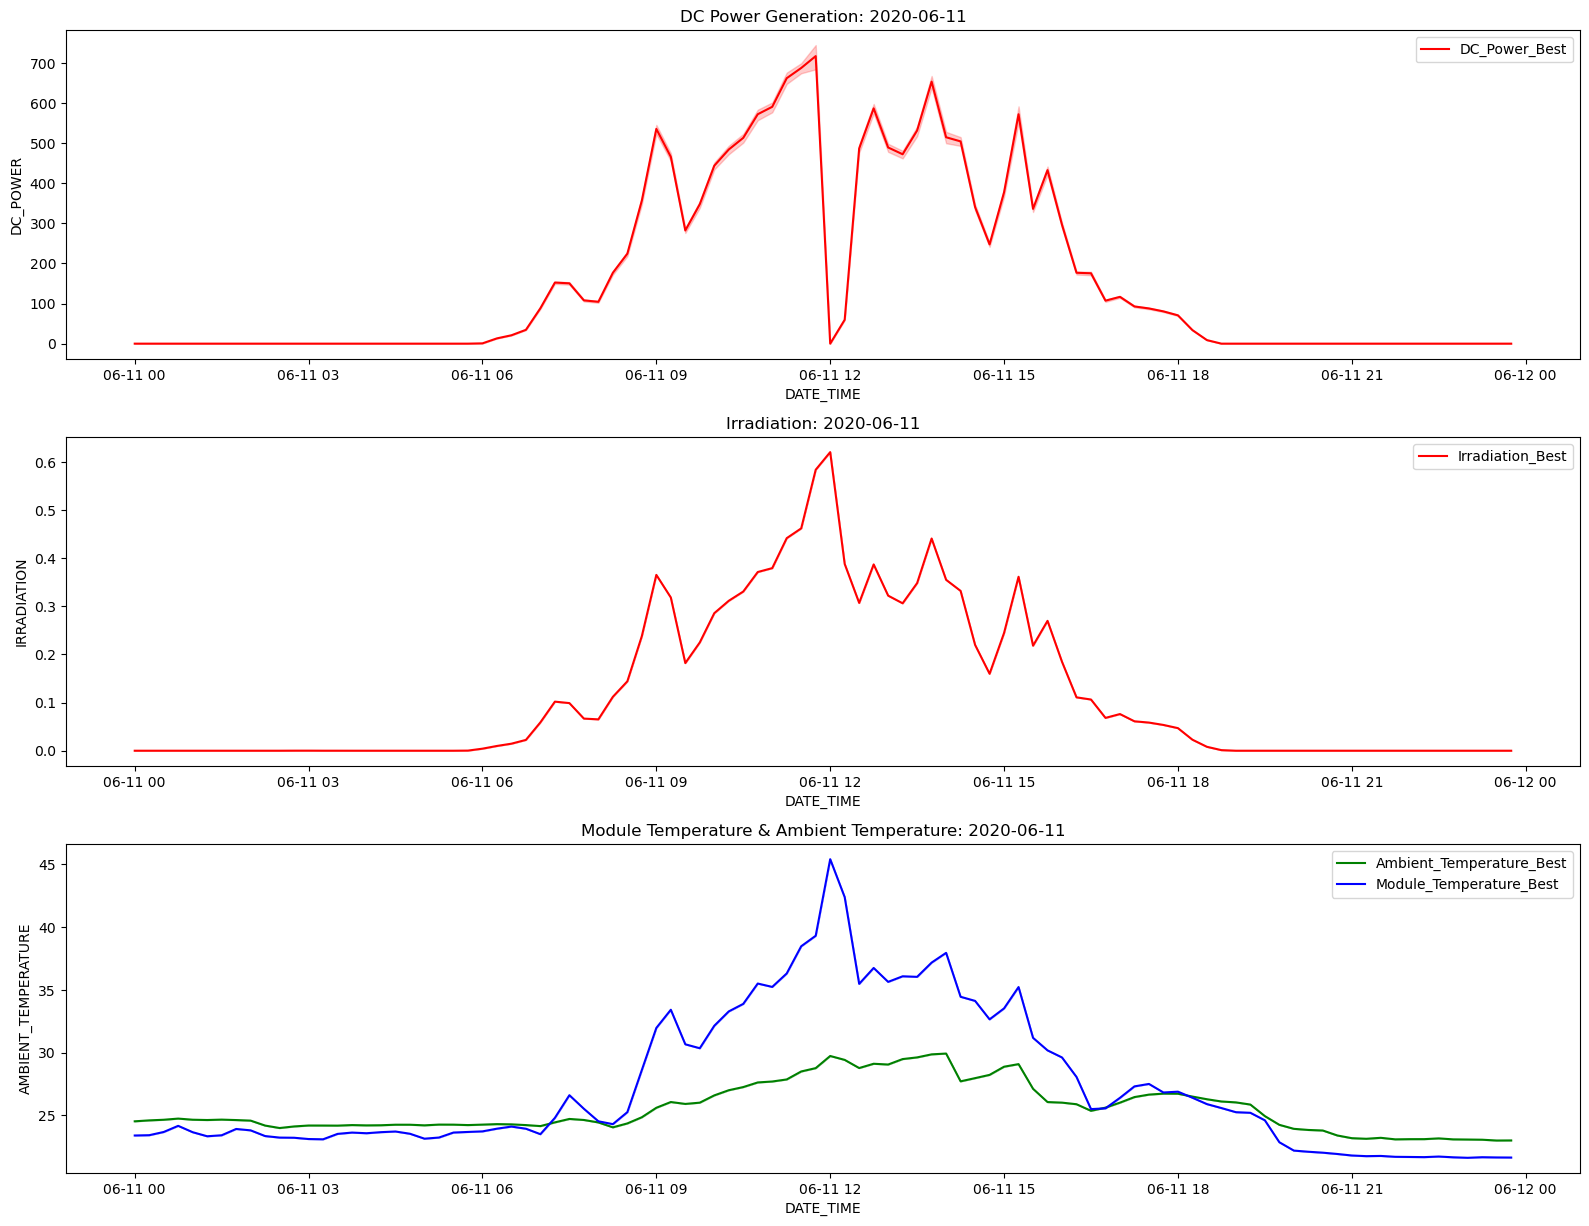

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))

date = ["2020-06-11"]

plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irradiation_Best", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph

Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:

At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt.

And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced.

The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system 

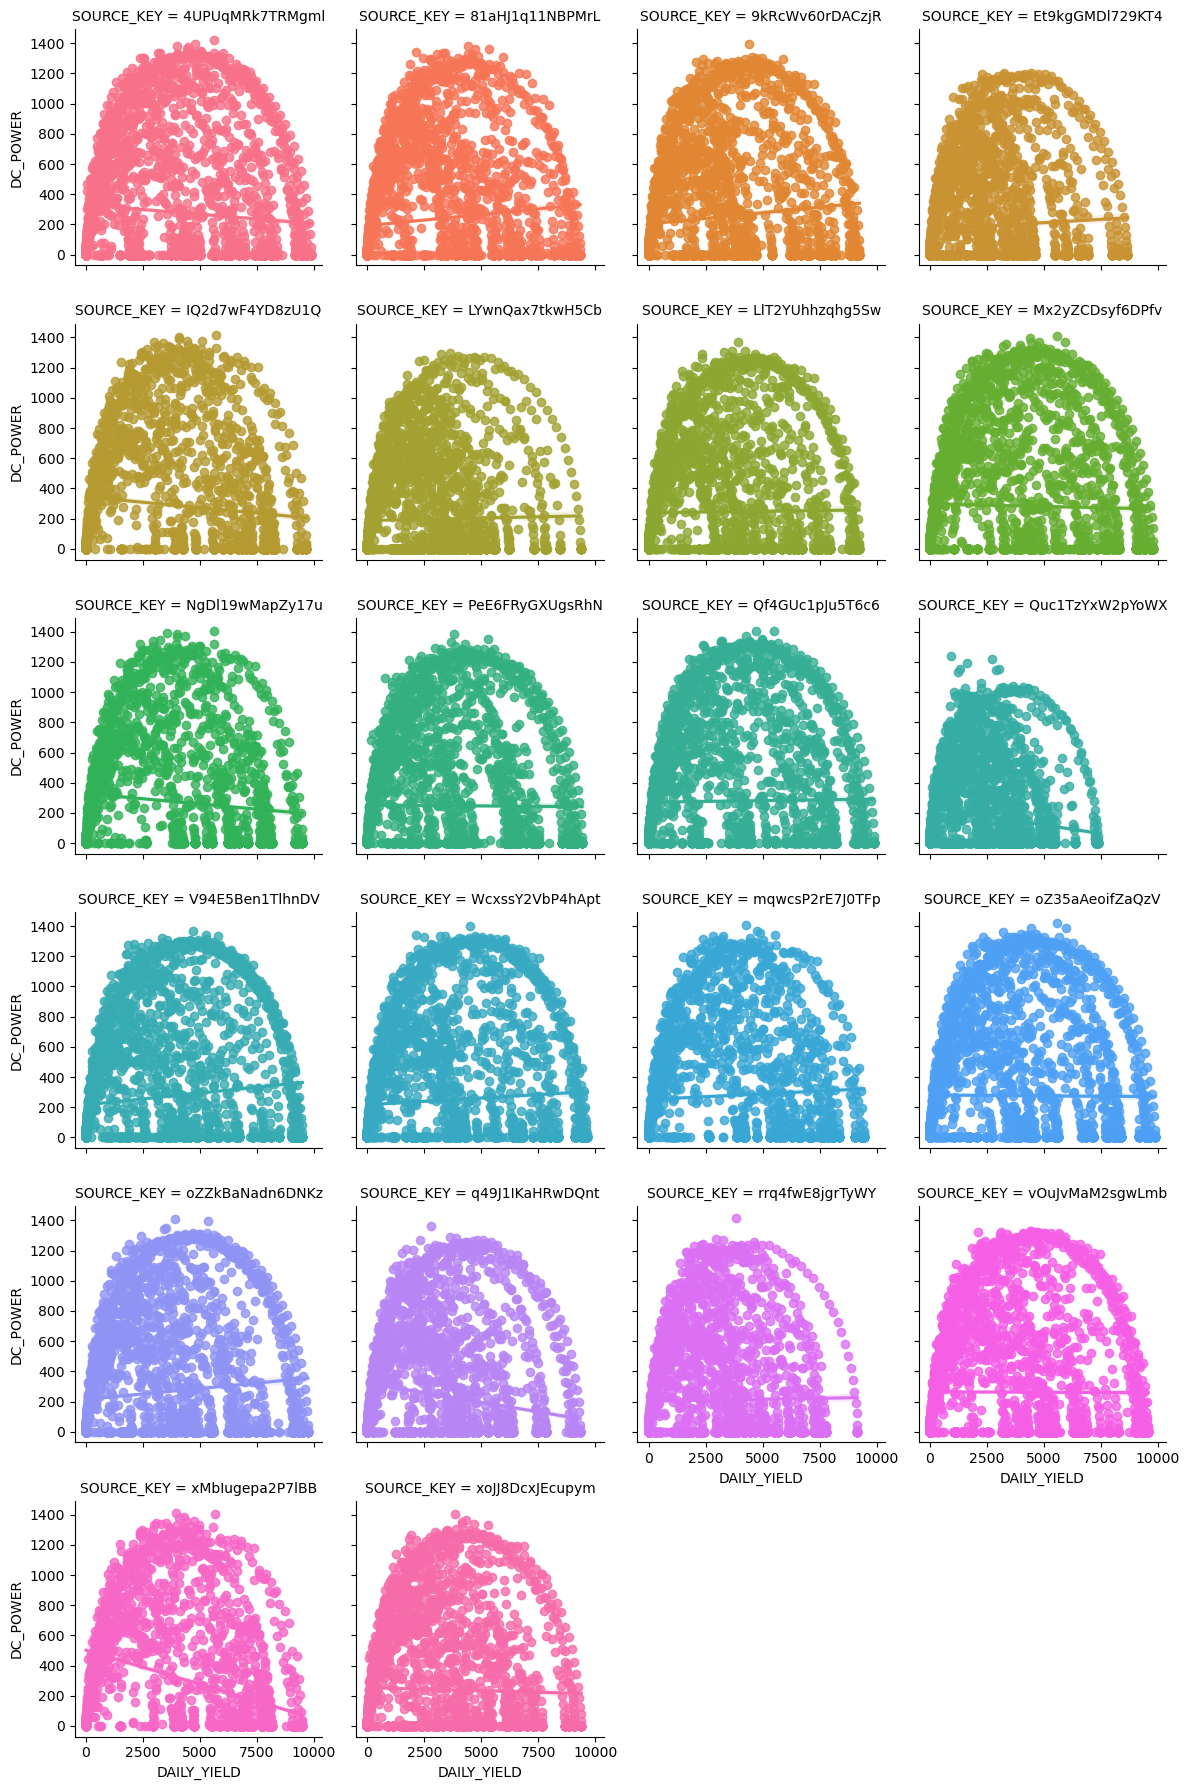

In [24]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation 

In [25]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [26]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [27]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [28]:
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

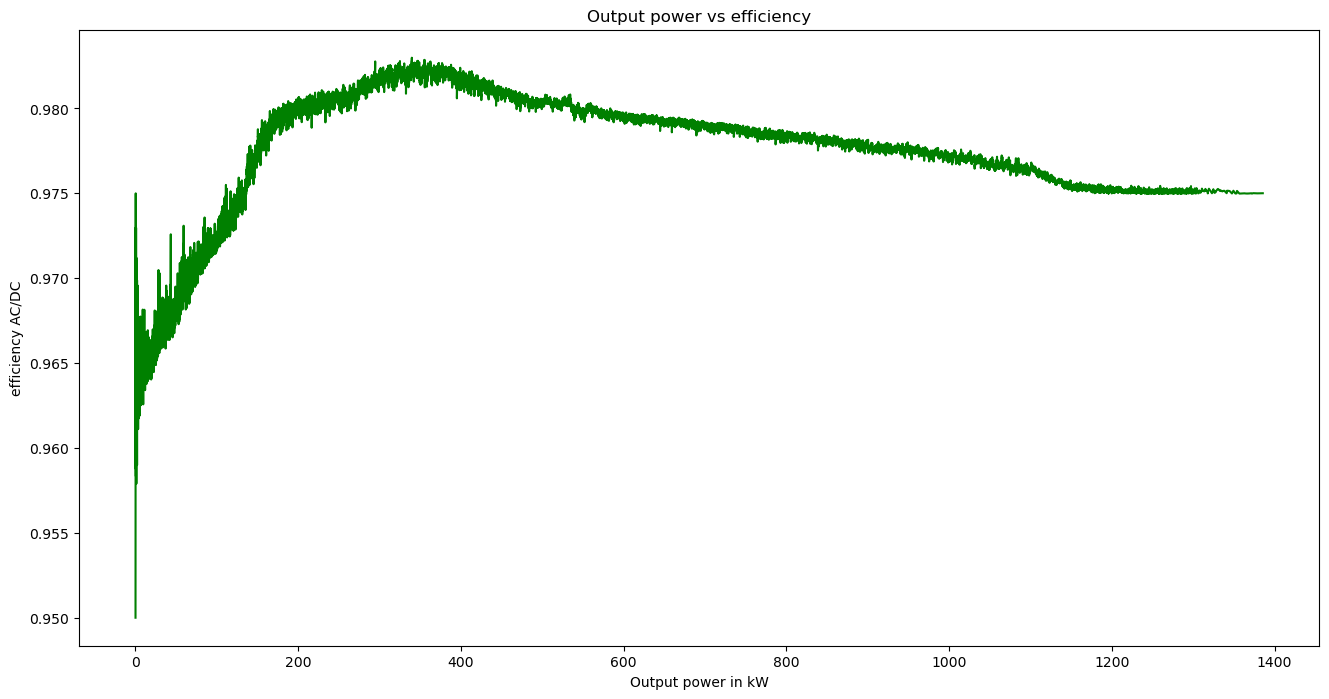

In [29]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

Solar Power Prediction

In [30]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [31]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [35]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

Model Building 

1. LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


2. RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


3. DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


12. Result Prediction

In [42]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.72413333 ...    0.         1007.18028571
    0.        ]


In [43]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000,0.000
50974,0.000,0.000
53919,684.913,684.724
2384,0.000,0.000
22014,0.000,0.000


In [44]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000,0.000,0.000
50974,0.000,0.000,0.000
53919,684.913,684.724,0.189
2384,0.000,0.000,0.000
22014,0.000,0.000,0.000


In [45]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
16586,550.746667,550.652205,0.094462
66716,743.714286,743.635843,0.078443
14473,1145.413333,1146.241605,-0.828271
29543,0.000000,0.000000,0.000000
40998,740.721429,740.565262,0.156167
65284,0.000000,0.000000,0.000000
37186,109.460000,109.312329,0.147671
45193,502.233333,502.291352,-0.058019
9817,74.578571,74.547229,0.031343
23299,1086.953333,1086.059533,0.893800
